In [1]:
!nvidia-smi

Mon Nov 25 04:48:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 5.35M/5.35M [00:00<00:00, 268MB/s]
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 104k/104k [00:00<00:00, 55.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 68.3ms
Speed: 12.0ms preprocess, 68.3ms inference, 937.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


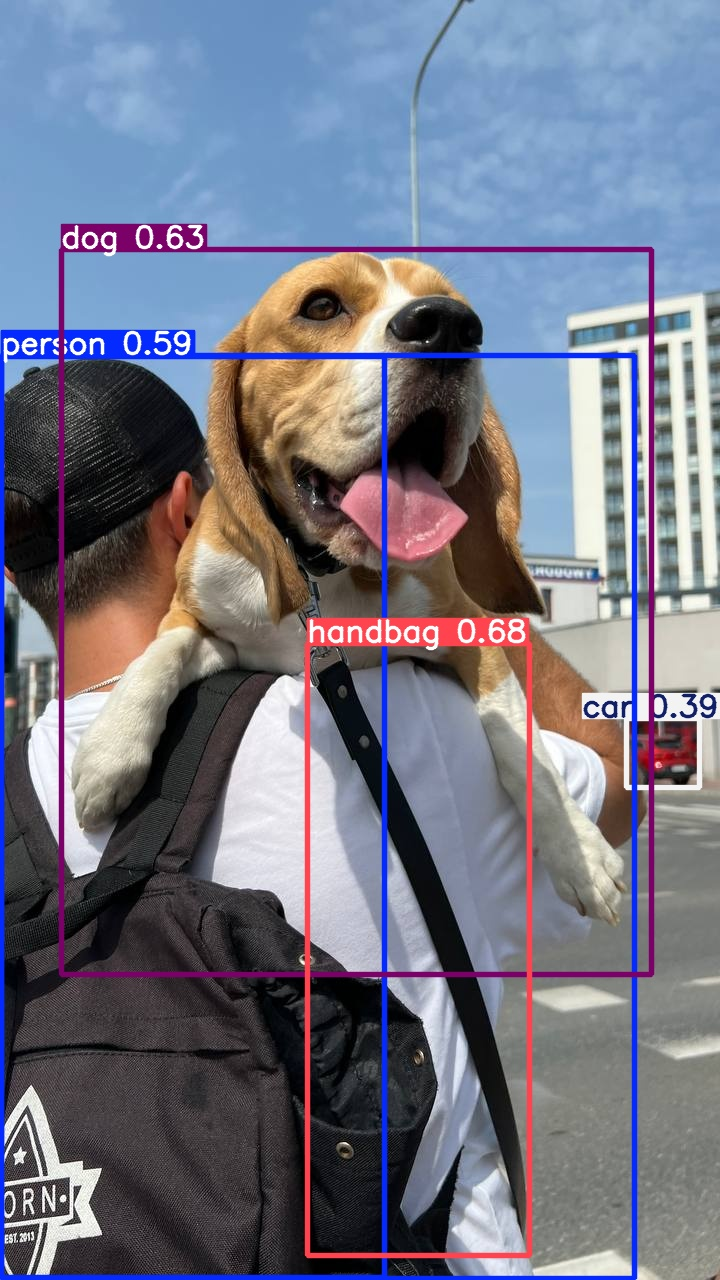

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/dog.jpg', width=600)

In [7]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 52.9ms
Speed: 3.8ms preprocess, 52.9ms inference, 587.3ms postprocess per image at shape (1, 3, 640, 384)


In [8]:
result.boxes.xyxy

tensor([[3.0705e+02, 6.4341e+02, 5.2919e+02, 1.2558e+03],
        [6.1400e+01, 2.4994e+02, 6.5165e+02, 9.7412e+02],
        [1.7803e+00, 3.5551e+02, 6.3404e+02, 1.2788e+03],
        [1.1933e+00, 3.5620e+02, 3.8455e+02, 1.2776e+03],
        [6.2615e+02, 7.1818e+02, 6.9975e+02, 7.8754e+02]], device='cuda:0')

In [9]:
result.boxes.conf

tensor([0.6832, 0.6284, 0.5941, 0.3923, 0.3875], device='cuda:0')

In [10]:
result.boxes.cls

tensor([26., 16.,  0.,  0.,  2.], device='cuda:0')

In [11]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

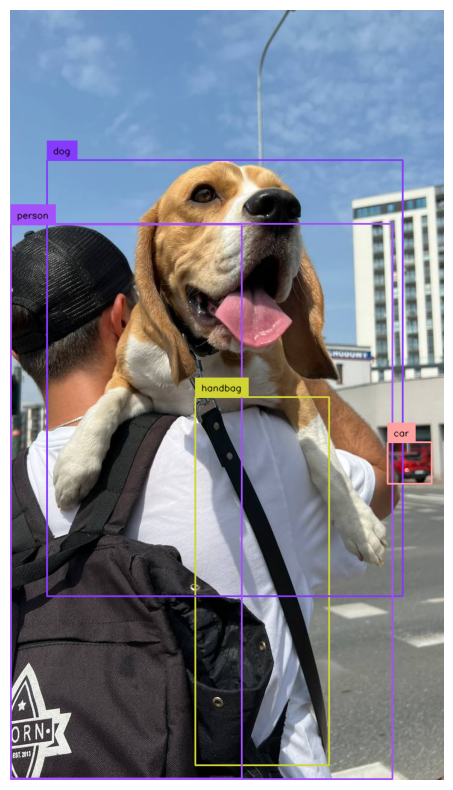

In [12]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [14]:
# !unzip birds.zip

In [19]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data=data.yaml epochs=40 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 479MB/s]
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

In [20]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1732510680.59d93b1395df.2847.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch6660.jpg  weights
P_curve.png					    train_batch6661.jpg
PR_curve.png					    train_batch6662.jpg


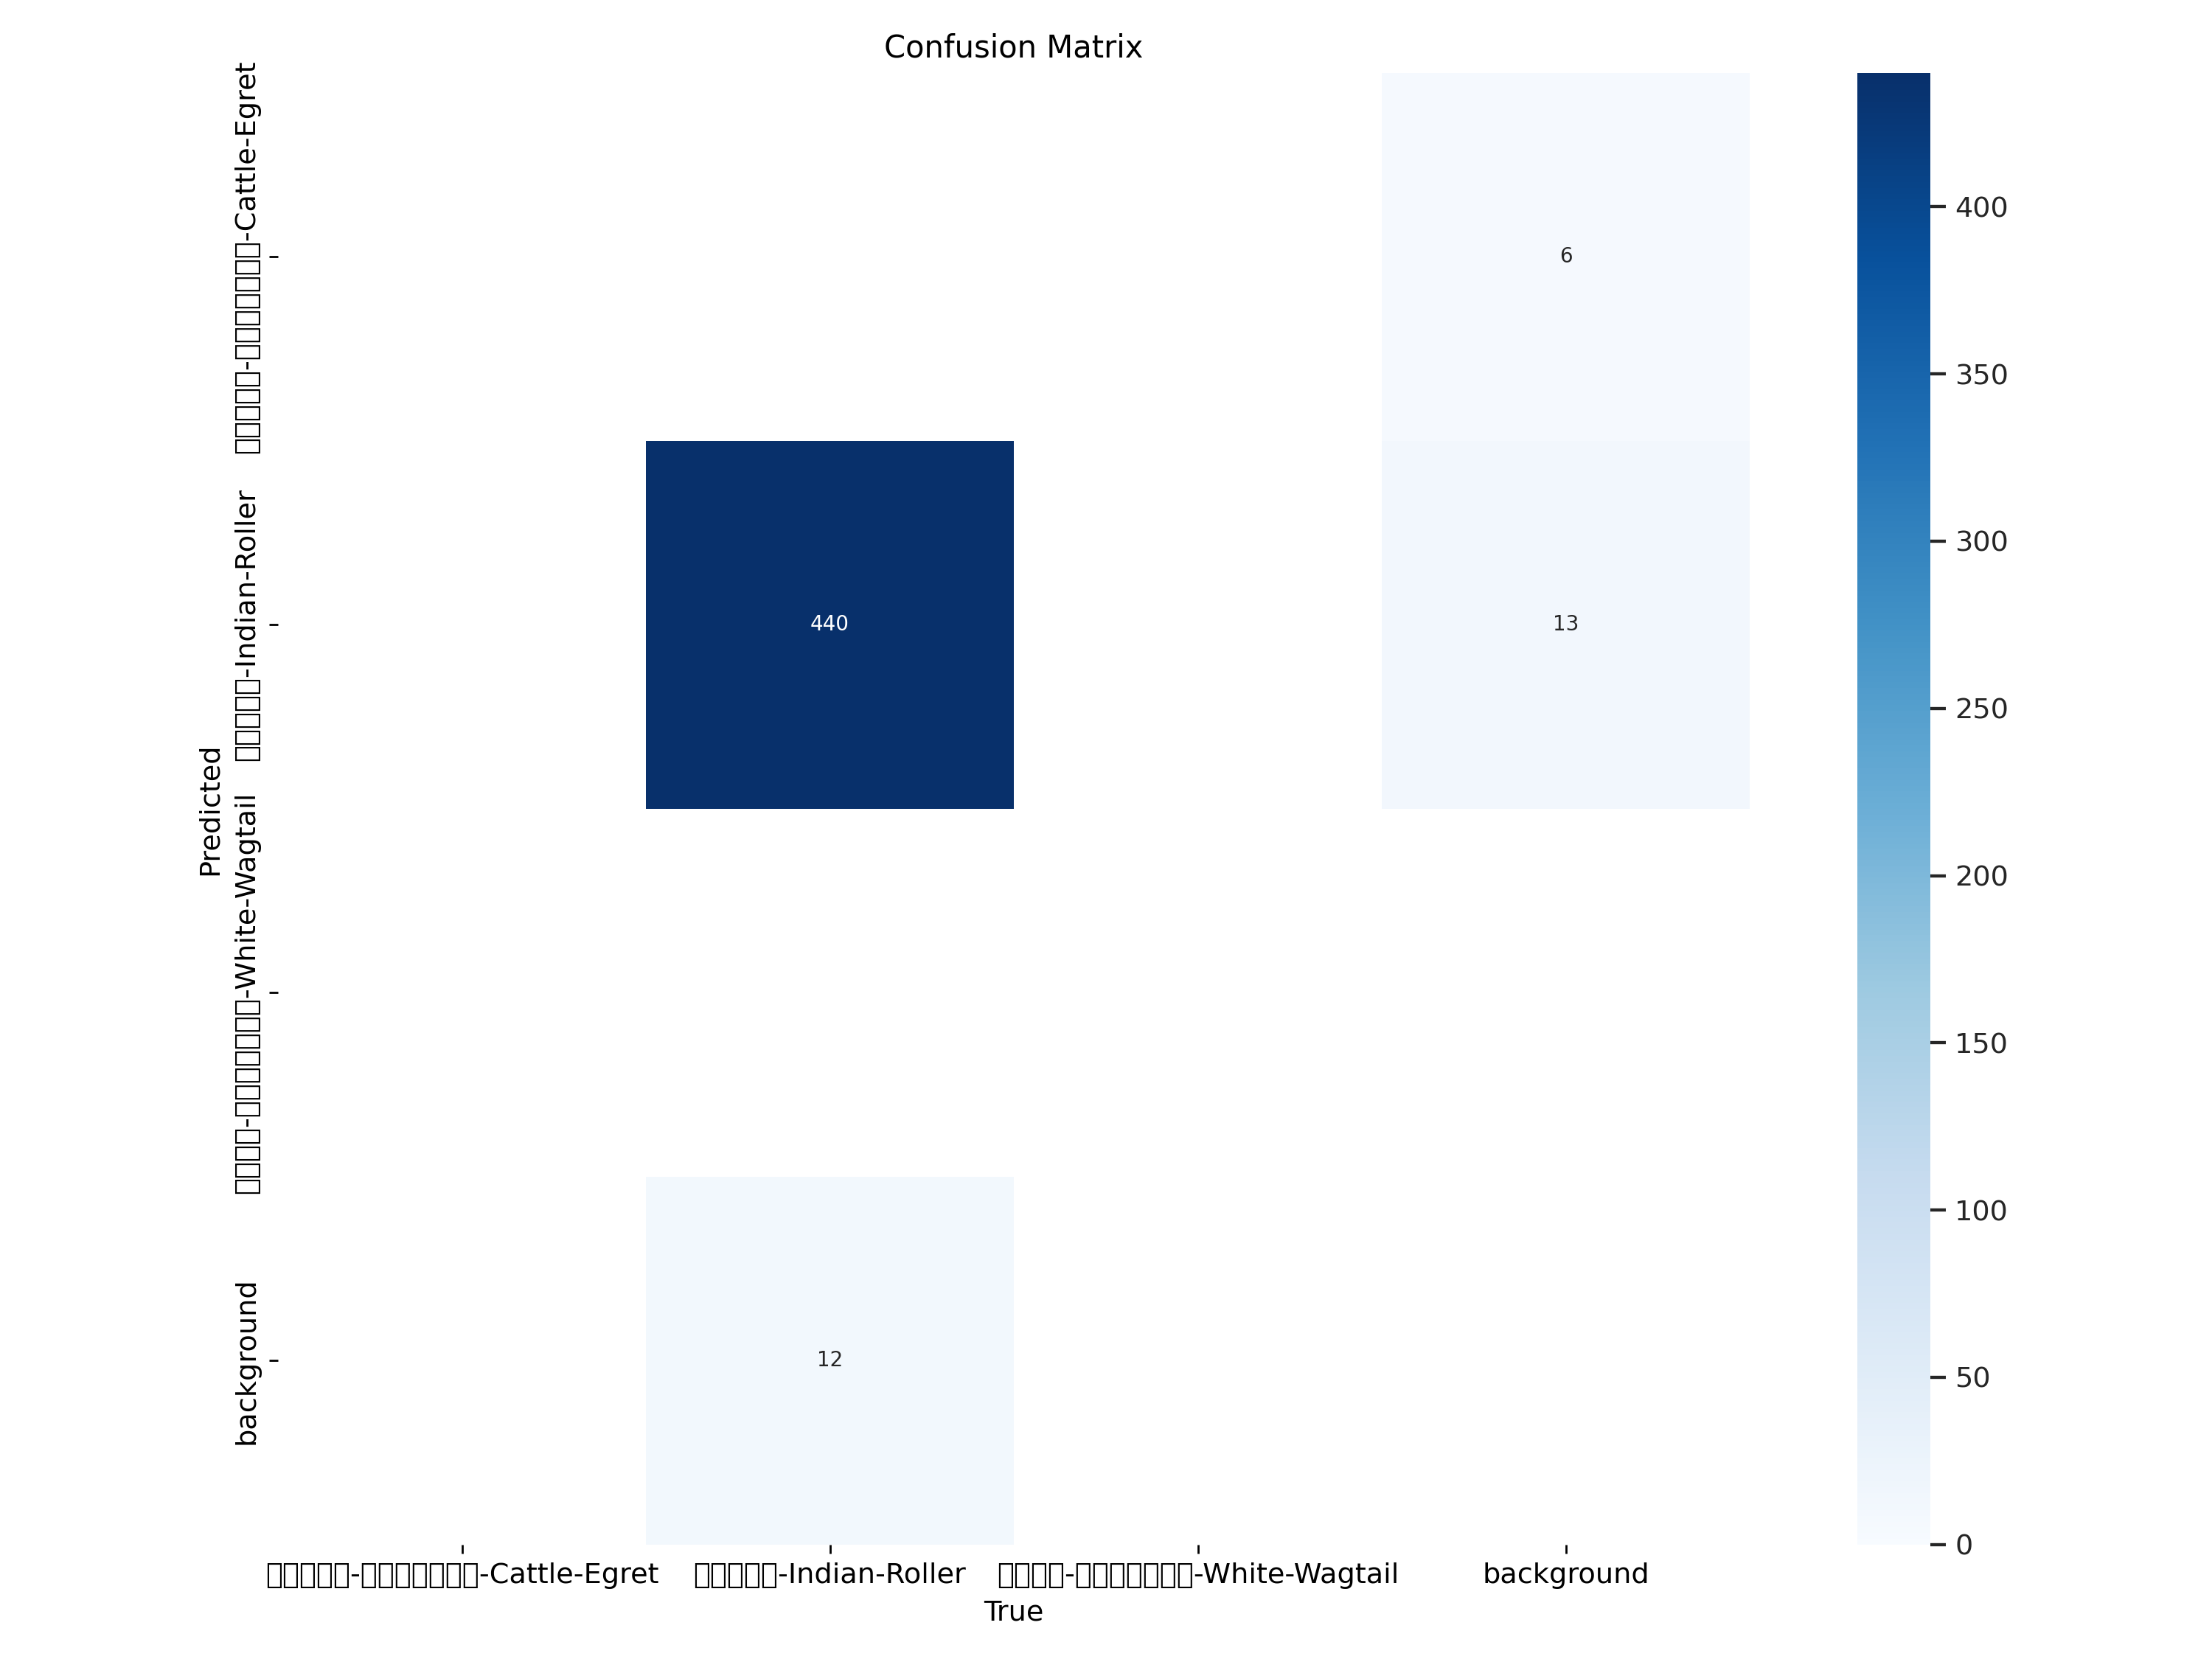

In [21]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

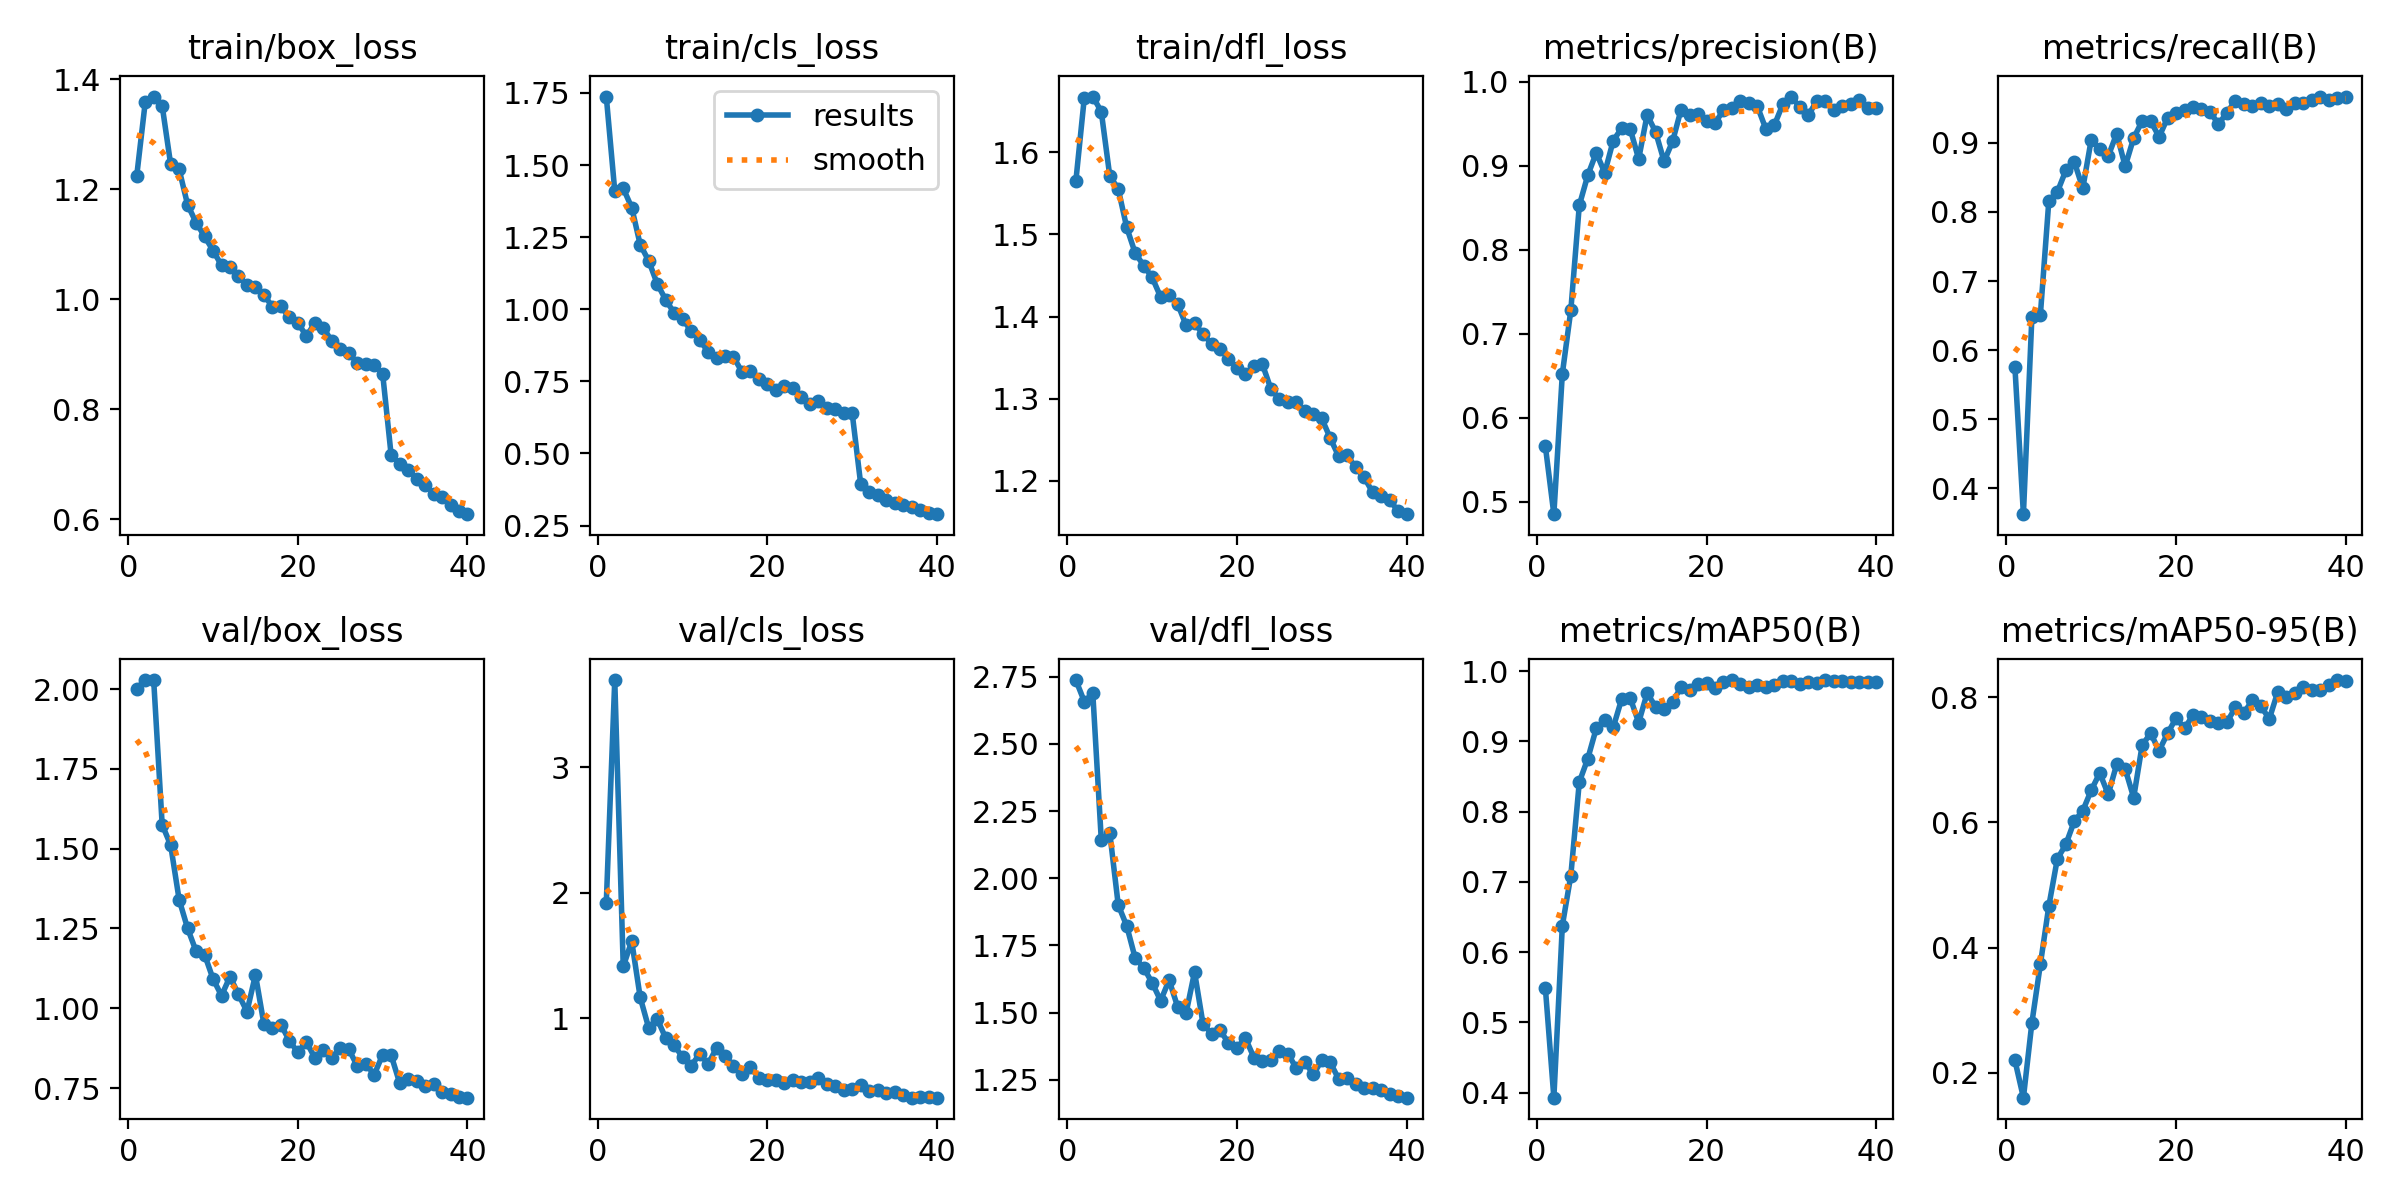

In [22]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

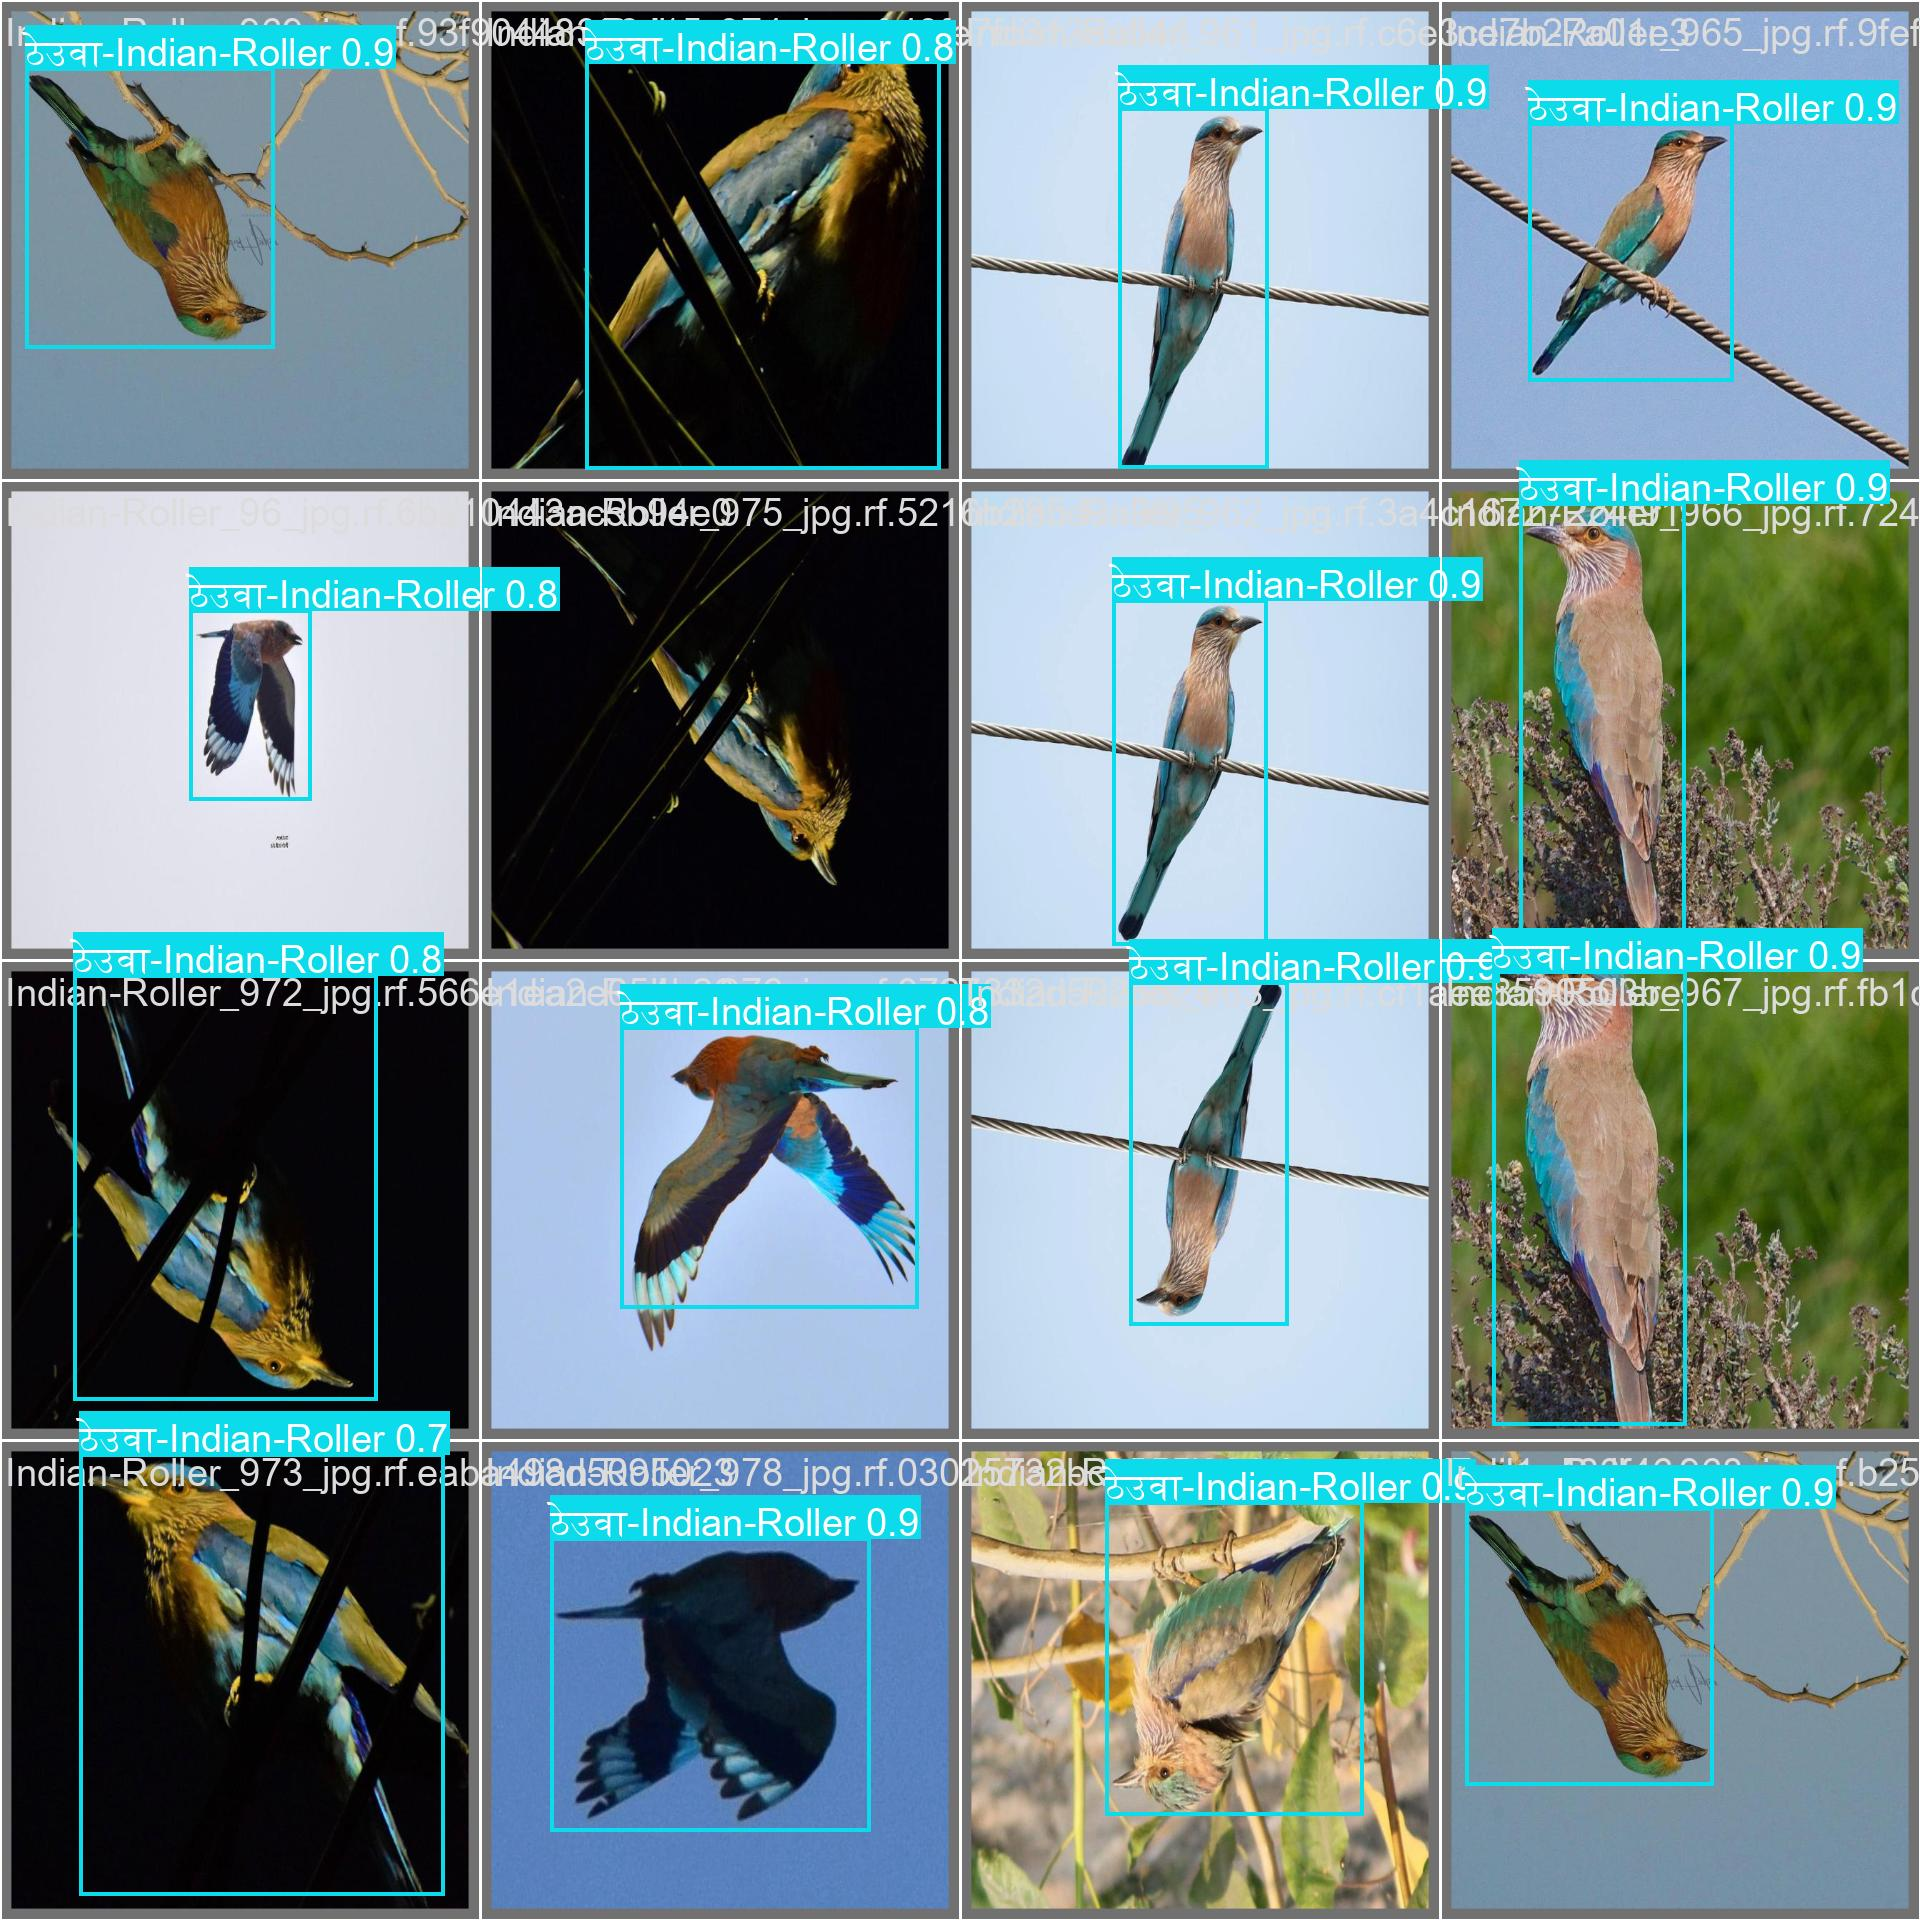

In [23]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [26]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/valid/labels.cache... 438 images, 0 backgrounds, 0 corrupt: 100% 438/438 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 28/28 [00:07<00:00,  3.82it/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 2336 (\N{DEVANAGARI LETTER TTHA}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/u

In [27]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=test/images save=True

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/438 /content/test/images/Cattle-Egret_1017_jpg.rf.78b5cc3caea3ff87e40fdb8c5abb9e3c.jpg: 640x640 1 वस्तु-बकुल्ला-Cattle-Egret, 21.0ms
image 2/438 /content/test/images/Cattle-Egret_1020_jpg.rf.33bc0c0cc9ba01683825073e2928d6a6.jpg: 640x640 1 वस्तु-बकुल्ला-Cattle-Egret, 17.9ms
image 3/438 /content/test/images/Cattle-Egret_1036_jpg.rf.27789a22fa20cf212991f8a7070fb357.jpg: 640x640 1 वस्तु-बकुल्ला-Cattle-Egret, 15.6ms
image 4/438 /content/test/images/Cattle-Egret_1044_jpg.rf.24b6546394684e632f0cac0456a5a753.jpg: 640x640 1 वस्तु-बकुल्ला-Cattle-Egret, 15.6ms
image 5/438 /content/test/images/Cattle-Egret_1048_jpg.rf.1e3617c16860bf7044ed2b2e0650870f.jpg: 640x640 1 वस्तु-बकुल्ला-Cattle-Egret, 15.6ms
image 6/438 /content/test/images/Cattle-Egret_1079_jpg.rf.d9e512be4c6a68b1301346bd38aea765.jpg: 640x640 1 वस्तु-बकुल्ला-Cattle-E

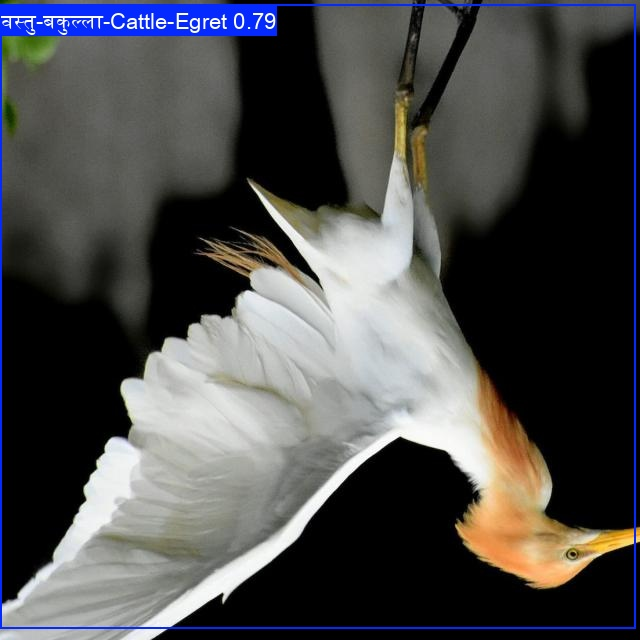

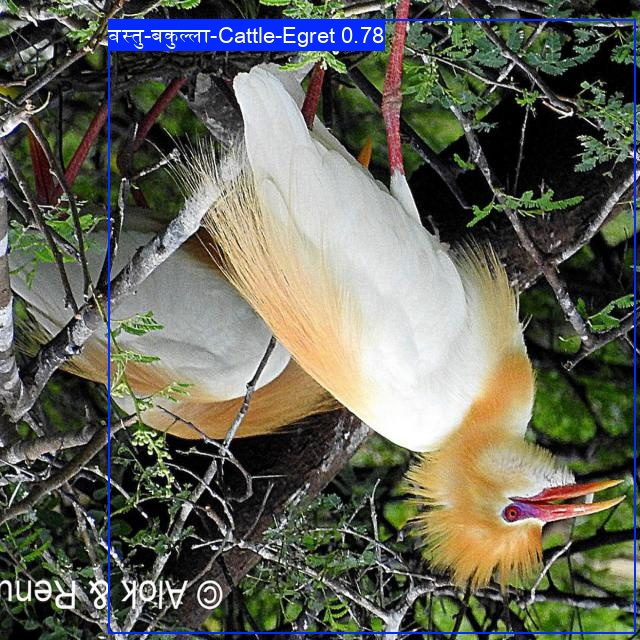

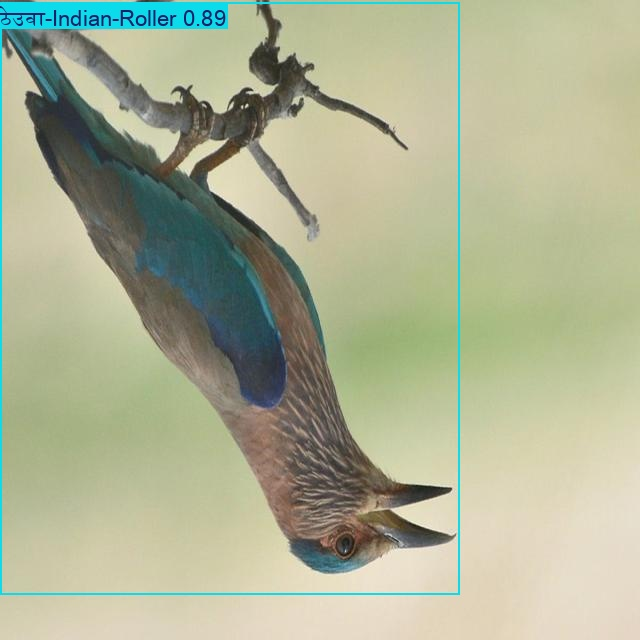

In [28]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")